In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df=pd.get_dummies(df,columns=['Urban','US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,0,1,0,1
1,11.22,111,48,16,260,83,Good,65,10,0,1,0,1
2,10.06,113,35,10,269,80,Medium,59,12,0,1,0,1
3,7.40,117,100,4,466,97,Medium,55,14,0,1,0,1
4,4.15,141,64,3,340,128,Bad,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,0,1,0,1
396,6.14,139,23,3,37,120,Medium,55,11,1,0,0,1
397,7.41,162,26,12,368,159,Medium,40,18,0,1,0,1
398,5.94,100,79,7,284,95,Bad,50,12,0,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban_No     400 non-null    uint8  
 10  Urban_Yes    400 non-null    uint8  
 11  US_No        400 non-null    uint8  
 12  US_Yes       400 non-null    uint8  
dtypes: float64(1), int64(7), object(1), uint8(4)
memory usage: 29.8+ KB


In [6]:
df['ShelveLoc']=df['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,3,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,3,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,0,1,0,1
396,6.14,139,23,3,37,120,2,55,11,1,0,0,1
397,7.41,162,26,12,368,159,2,40,18,0,1,0,1
398,5.94,100,79,7,284,95,3,50,12,0,1,0,1


In [7]:
# Model building

In [8]:
x = df.iloc[:,1:]
y = df['Sales']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [10]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [11]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.6078816106496671
MSE: 3.253189532999999
RMSE: 1.803660038089218


In [12]:
#Visualize the rf

In [13]:
len(rf.estimators_)

100

In [14]:
rf.estimators_[0]

DecisionTreeRegressor(max_features=1.0, random_state=1535596446)

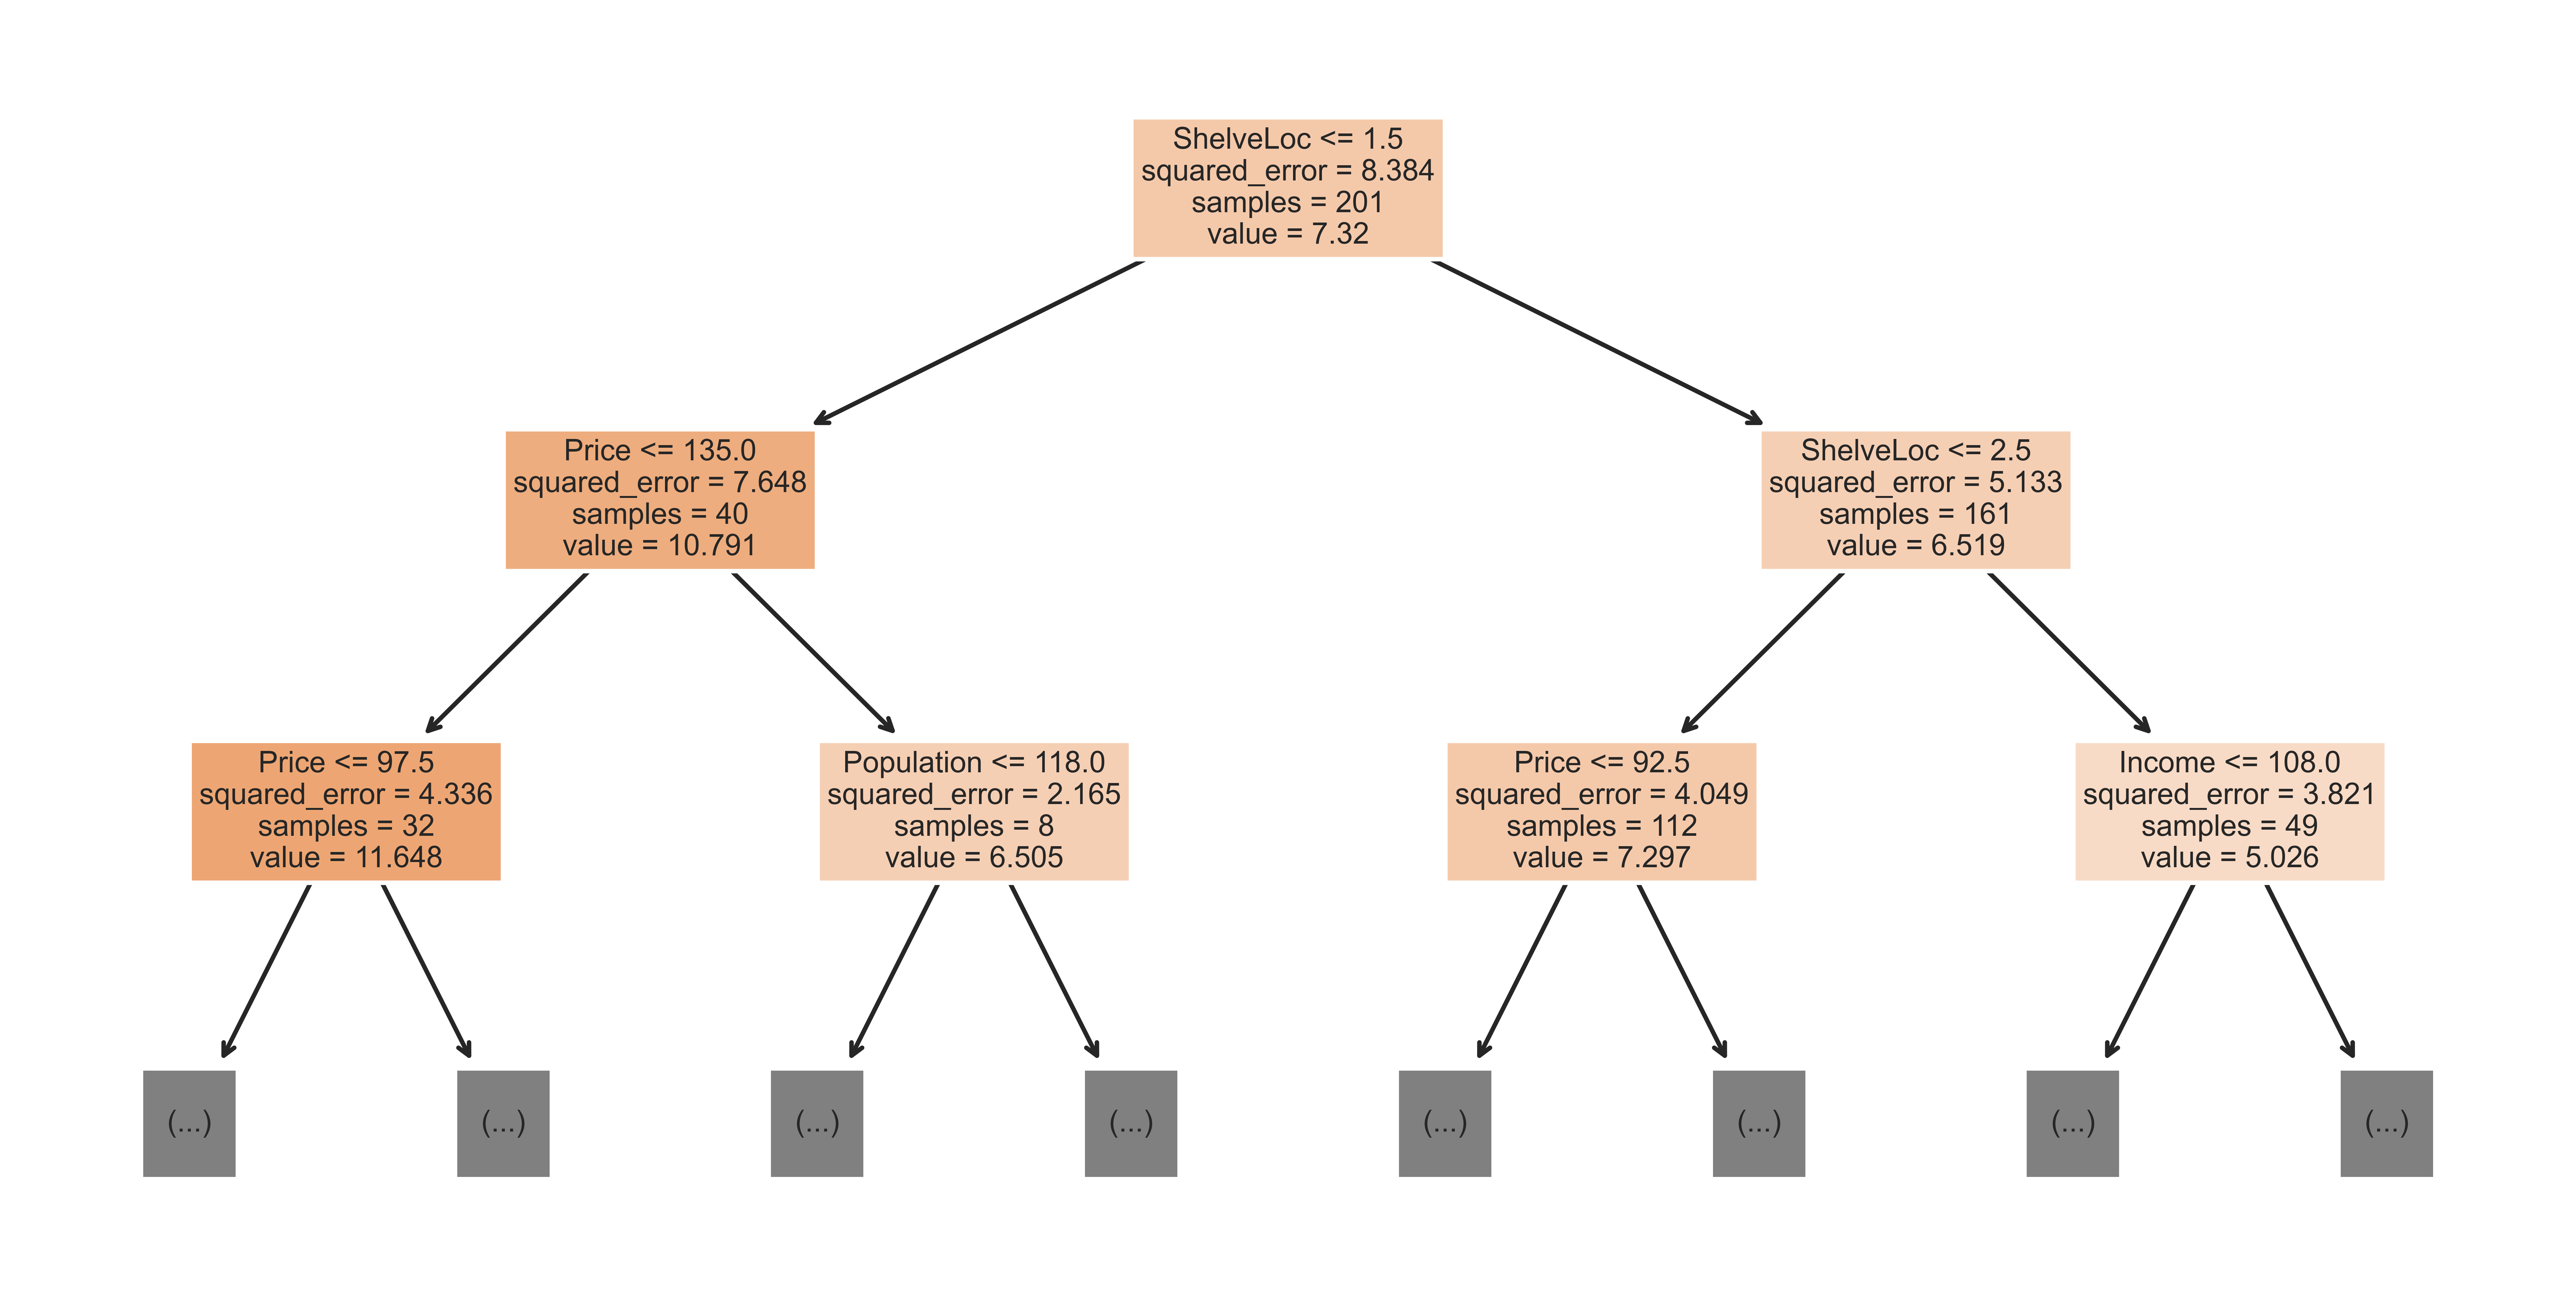

In [15]:
tree.plot_tree(rf.estimators_[0], feature_names=list(x.columns),
              filled=True, max_depth=2)
plt.show()

In [16]:
# Classification

In [17]:
x=df.iloc[:,0:]
y=df['ShelveLoc']

In [18]:
x.drop(columns='ShelveLoc',inplace=True)
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,1
396,6.14,139,23,3,37,120,55,11,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,1,0,1
398,5.94,100,79,7,284,95,50,12,0,1,0,1


<Axes: xlabel='ShelveLoc', ylabel='count'>

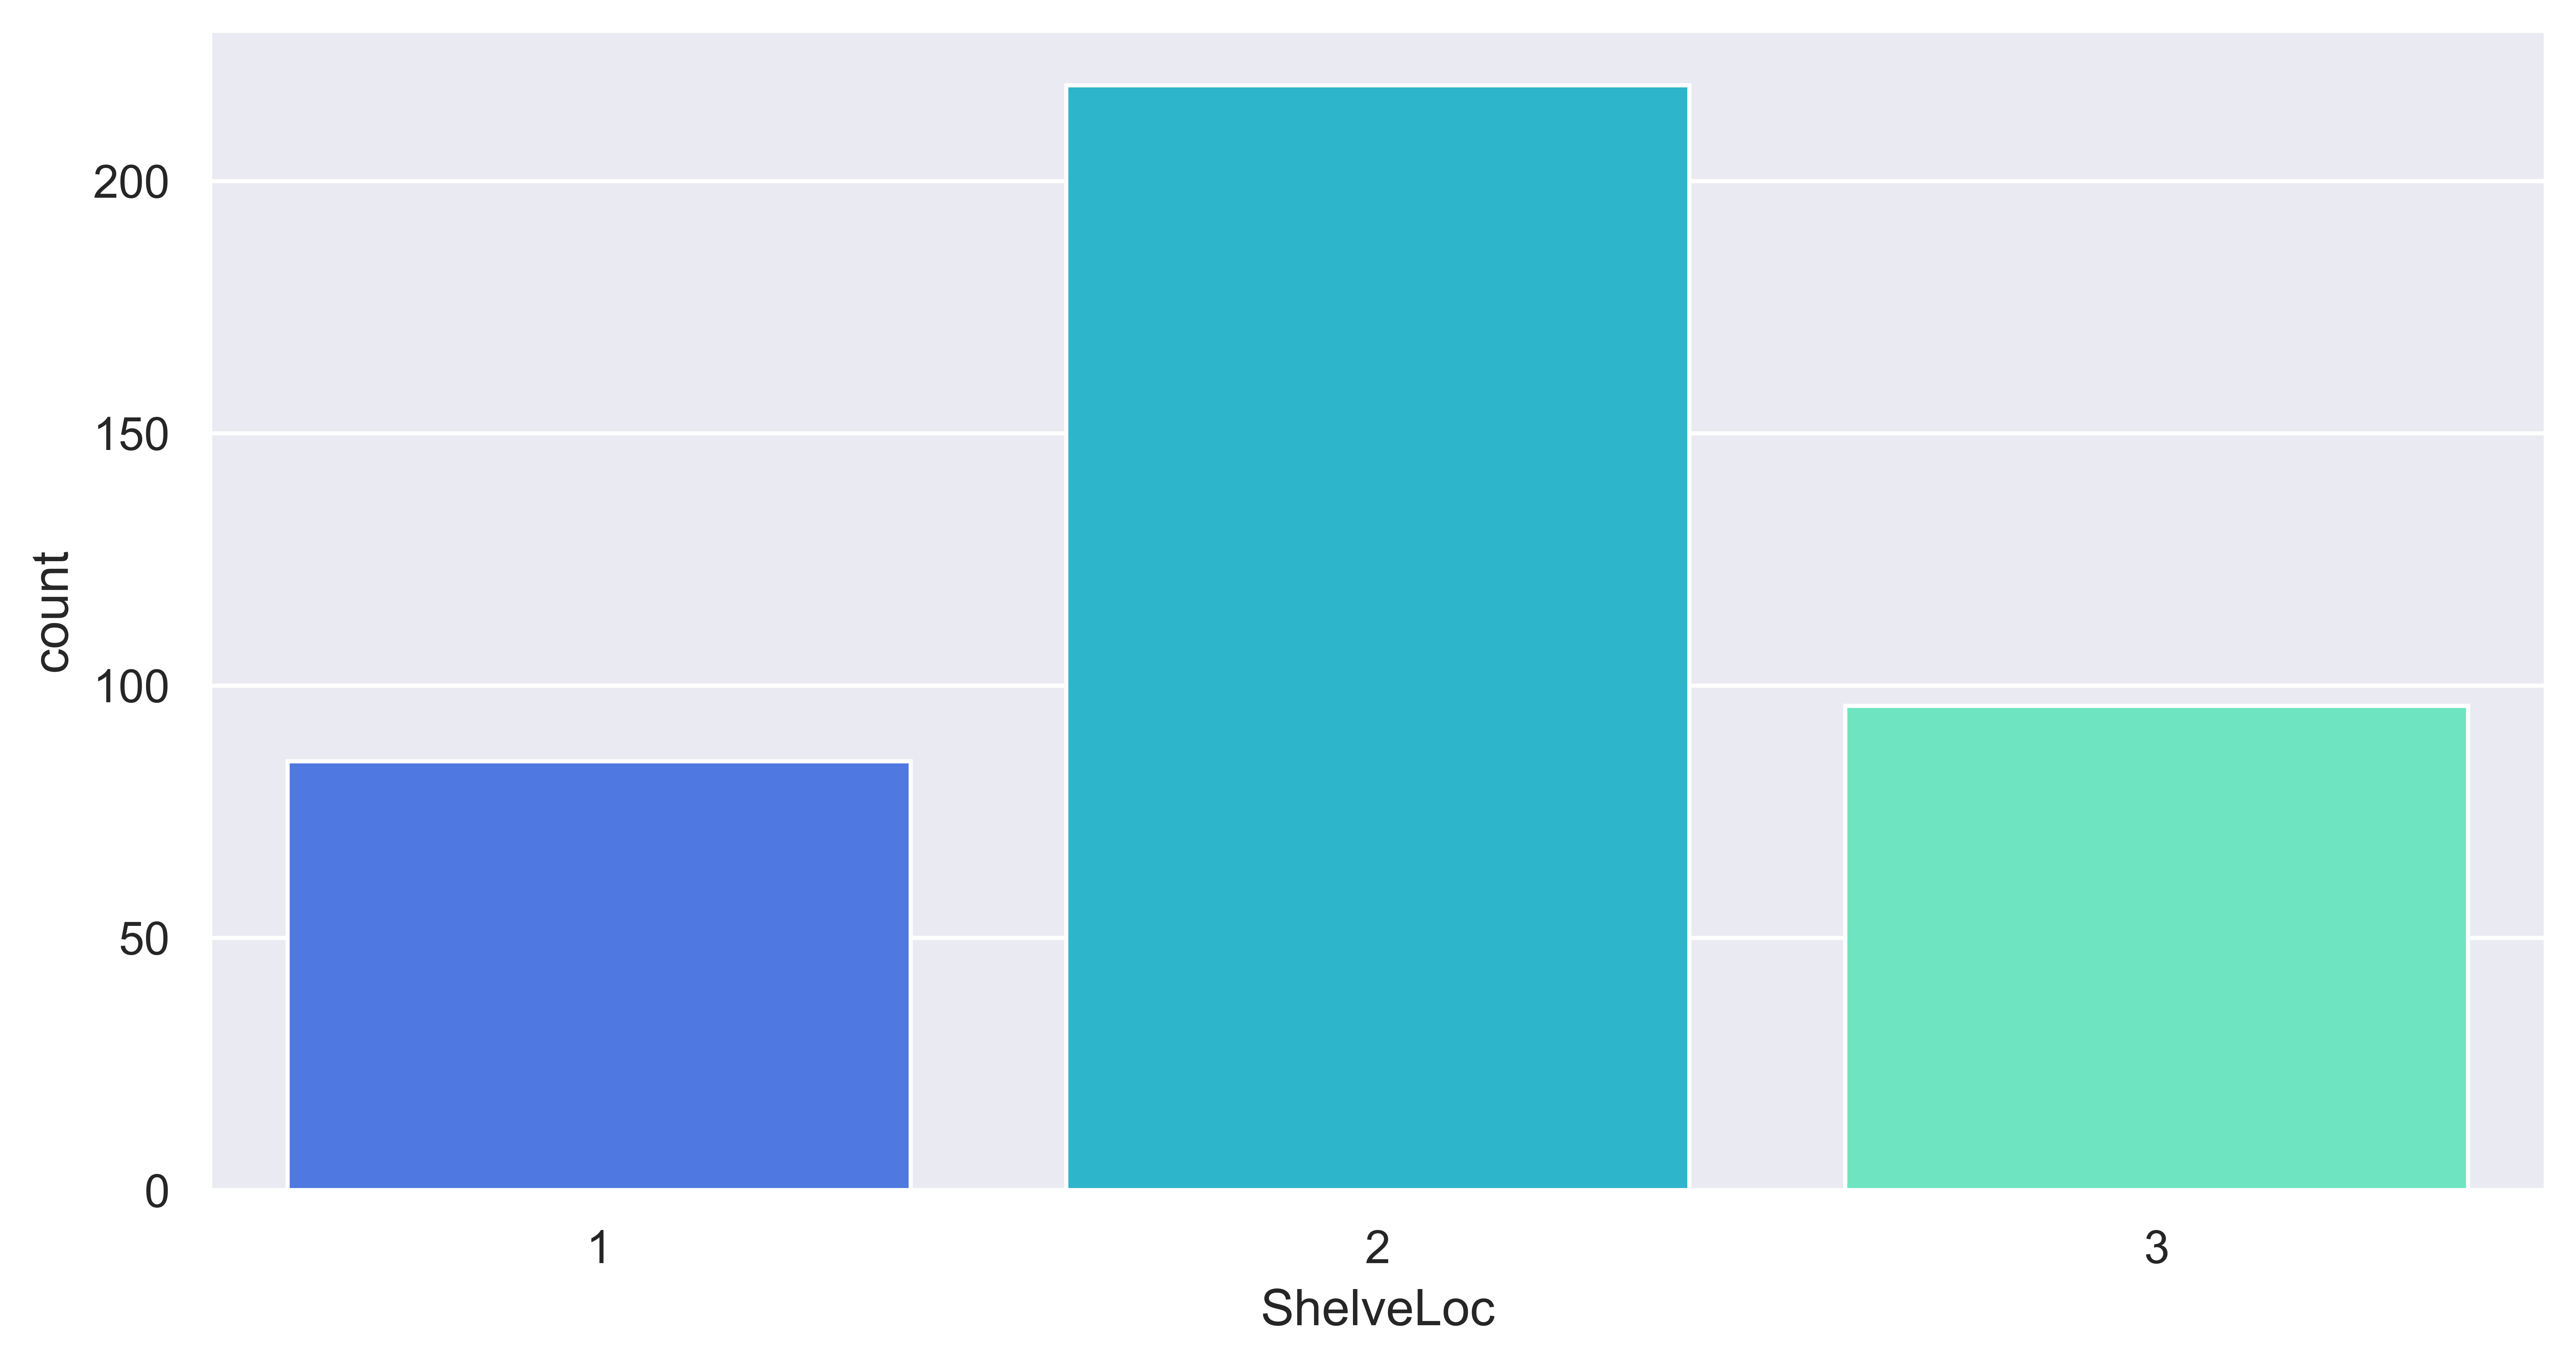

In [19]:
sns.countplot(x=df['ShelveLoc'])

In [20]:
#Evaluate model

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [22]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [23]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.62      0.33      0.43        15
           2       0.60      0.84      0.70        45
           3       0.56      0.25      0.34        20

    accuracy                           0.60        80
   macro avg       0.59      0.48      0.49        80
weighted avg       0.60      0.60      0.56        80



In [24]:
rfc.score(xtrain,ytrain), rfc.score(xtest,ytest)

(1.0, 0.6)

In [25]:
# Hyperparameter tuning


In [26]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {
    'n_estimators' : [50,100,150,200,250],
    'criterion' : ["gini"],
    'max_depth' : [3,5,7,9,11,13,15],
    'max_features' : ["sqrt", "log2", None]
}

In [50]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,
                   verbose=1)

In [51]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=1)

In [52]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'n_estimators': 150}

In [53]:
rfc = RandomForestClassifier(criterion='gini',max_depth=9,n_estimators=150,max_features='log2')
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [54]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           1       0.71      0.33      0.45        15
           2       0.60      0.87      0.71        45
           3       0.50      0.20      0.29        20

    accuracy                           0.60        80
   macro avg       0.60      0.47      0.48        80
weighted avg       0.60      0.60      0.56        80



In [55]:
rfc.score(xtrain,ytrain), rfc.score(xtest,ytest)

(0.9875, 0.6)